In [126]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [127]:
print(f"System stats")
print(torch.__version__)
device = "cuda" if(torch.cuda.is_available()) else "cpu"
print(f"device: {device}")

System stats
2.7.1+cu128
device: cuda


In [128]:
#Create data
weight=.3
bias=.8
X=torch.arange(1,1000,10).unsqueeze(dim=1).float()
y=X*weight+bias

In [129]:
#split training and testing data
x_train,y_train=X[:int(len(X)*.8)],y[:int(len(X)*.8)]
x_test,y_test=X[int(len(X)*.8):],y[int(len(X)*.8):]
print(f"dataset stats\n Number of train: {len(x_train)} \n Number of test {len(x_test)} \n Total: {len(X)}")

dataset stats
 Number of train: 80 
 Number of test 20 
 Total: 100


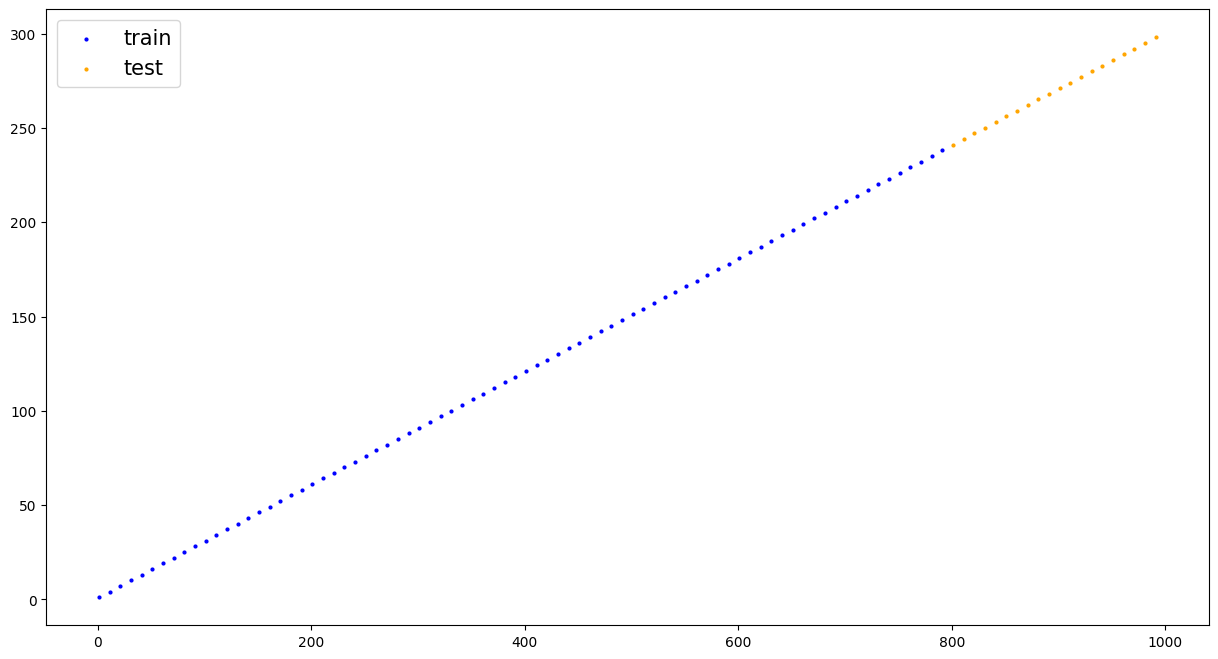

In [130]:
plt.figure(figsize=(15,8))
plt.scatter(x_train,y_train,c="blue",s=4,label="train")
plt.scatter(x_test,y_test,c="orange",s=4,label="test")
plt.legend(prop={"size":15})


In [131]:
class linearlayermodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer=nn.Linear(in_features=1,
           
                               out_features=1)
    def forward(self,X:torch.Tensor):
        return self.linear_layer(X)

model_1=linearlayermodel()
model_1,model_1.state_dict()

(linearlayermodel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [132]:
print(list(model_1.parameters())[0].device)

print(next(model_1.parameters()).device)

cpu
cpu


In [133]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [134]:
loss_fn=nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.000001)
#loss_fn=nn.MSELoss()


In [135]:
torch.manual_seed(42)


Epoch: 0 | Train loss: 0.13620 | Test loss: 0.01352
Epoch: 10 | Train loss: 0.10205 | Test loss: 0.08877
Epoch: 20 | Train loss: 0.11761 | Test loss: 0.05464
Epoch: 30 | Train loss: 0.13027 | Test loss: 0.02714
Epoch: 40 | Train loss: 0.14086 | Test loss: 0.00283
Epoch: 50 | Train loss: 0.09732 | Test loss: 0.09971
Epoch: 60 | Train loss: 0.11366 | Test loss: 0.06377
Epoch: 70 | Train loss: 0.12769 | Test loss: 0.03306
Epoch: 80 | Train loss: 0.13828 | Test loss: 0.00876
Epoch: 90 | Train loss: 0.10558 | Test loss: 0.08059
Epoch: 100 | Train loss: 0.12038 | Test loss: 0.04828
Epoch: 110 | Train loss: 0.13235 | Test loss: 0.02237
Epoch: 120 | Train loss: 0.14294 | Test loss: 0.00219
Epoch: 130 | Train loss: 0.10086 | Test loss: 0.09153
Epoch: 140 | Train loss: 0.11642 | Test loss: 0.05740
Epoch: 150 | Train loss: 0.12976 | Test loss: 0.02830
Epoch: 160 | Train loss: 0.14036 | Test loss: 0.00400
Epoch: 170 | Train loss: 0.10912 | Test loss: 0.07422
Epoch: 180 | Train loss: 0.12314 | Test

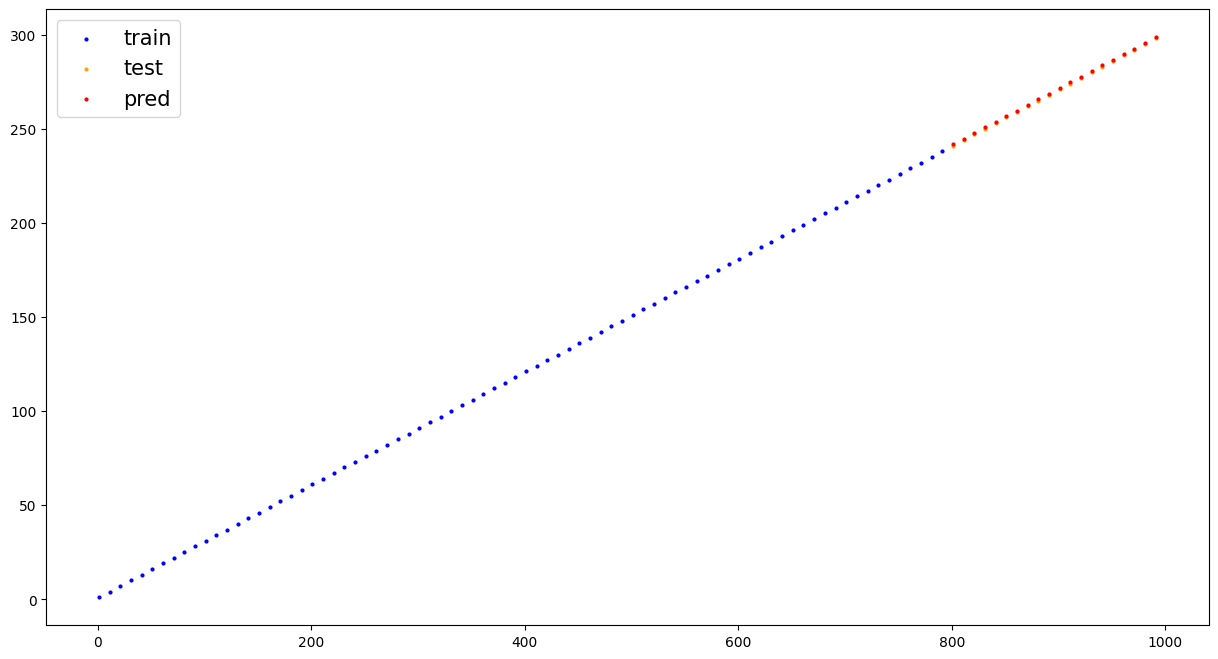

In [ ]:
epochs=20000
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)
for epoch in range(epochs):
    model_1.train()
    y_pred=model_1(x_train)
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        y_test_pred=model_1(x_test)
        test_loss=loss_fn(y_test_pred,y_test)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f} | Test loss: {test_loss:.5f}")
plt.figure(figsize=(15,8))
plt.scatter(x_train.cpu(),y_train.cpu(),c="blue",s=4,label="train")
plt.scatter(x_test.cpu(),y_test.cpu(),c="orange",s=4,label="test")
plt.scatter(x_test.cpu(),y_test_pred.cpu(),c="red",s=4,label="pred")
plt.legend(prop={"size":15})
plt.show()
